In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainings/adult.csv
/kaggle/input/trainings/narendramodi_tweets.csv
/kaggle/input/trainings/employees_attrition.csv
/kaggle/input/trainings/naukri_jobs_datascience.csv
/kaggle/input/trainings/restaurant_reviews.csv
/kaggle/input/trainings/insurance.csv
/kaggle/input/trainings/odi-batting.csv
/kaggle/input/trainings/amazon_reviews_big.csv
/kaggle/input/trainings/bank-full.csv
/kaggle/input/trainings/sales_store_data.csv
/kaggle/input/trainings/IMDB Dataset.csv
/kaggle/input/trainings/sales_data.csv
/kaggle/input/trainings/Advertising.csv
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin


In [26]:
from gensim.parsing.preprocessing import PorterStemmer, remove_stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [27]:
imdb = pd.read_csv('/kaggle/input/trainings/IMDB Dataset.csv')
print(imdb.shape)
imdb.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
docs = imdb['review'].str.lower().str.replace('[^a-z\s]', '')
docs = docs.apply(remove_stopwords)
stemmer = PorterStemmer()
docs = stemmer.stem_documents(docs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [6]:
train_docs, test_docs = train_test_split(pd.Series(docs), test_size=0.2, random_state=1)


vectorizer = CountVectorizer(min_df=5).fit(train_docs)
vocab = vectorizer.get_feature_names()

train_dtm = vectorizer.transform(train_docs)
test_dtm = vectorizer.transform(test_docs)

train_y = imdb.loc[train_docs.index, 'sentiment']
test_y = imdb.loc[test_docs.index, 'sentiment']
train_y.shape

(40000,)

In [ ]:
train_dtm

In [7]:
total_values = 40000 * 25748
non_zero = 3230445 
zero_values = total_values - non_zero
sparsity = zero_values / total_values * 100
sparsity

99.68634020118068

## Model Fitting

In [9]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB().fit(train_dtm, train_y)
test_y_pred = naive_bayes_model.predict(test_dtm)

In [17]:
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy score: ', accuracy_score(test_y, test_y_pred))
print('F1 score: ', f1_score(test_y, test_y_pred, pos_label='negative'))

Accuracy score:  0.852
F1 score:  0.8558347944671731


In [20]:
vectorizer = TfidfVectorizer(min_df=5).fit(train_docs)
vocab = vectorizer.get_feature_names()

train_dtm = vectorizer.transform(train_docs)
test_dtm = vectorizer.transform(test_docs)

naive_bayes_model = MultinomialNB().fit(train_dtm, train_y)
test_y_pred = naive_bayes_model.predict(test_dtm)

print('Accuracy score: ', accuracy_score(test_y, test_y_pred))
print('F1 score: ', f1_score(test_y, test_y_pred, pos_label='negative'))

Accuracy score:  0.8599
F1 score:  0.8617388729892431


positive    25000
negative    25000
Name: sentiment, dtype: int64

### Sentiment analysis using Rule Based Algorithms

In [22]:
docs = imdb['review']
docs.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# https://github.com/cjhutto/vaderSentiment
analyzer = SentimentIntensityAnalyzer()
review = 'i hate tea'
analyzer.polarity_scores(review)

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [41]:
review = 'i hate tea and i love cofee'
analyzer.polarity_scores(review)

{'neg': 0.339, 'neu': 0.275, 'pos': 0.385, 'compound': 0.128}

In [37]:
total_score = 0.5
compound_score = total_score / np.sqrt(np.square(total_score) + 15)
compound_score

0.12803687993289598

In [57]:
print(analyzer.polarity_scores('i love tea'))
print(analyzer.polarity_scores('i LOVE tea'))
print(analyzer.polarity_scores('i LOVE tea!!!!'))
print(analyzer.polarity_scores('i very much LOVE tea!!!!'))
print(analyzer.polarity_scores('i very much LOVE tea!!!! :)'))

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.7125}
{'neg': 0.0, 'neu': 0.141, 'pos': 0.859, 'compound': 0.7964}
{'neg': 0.0, 'neu': 0.32, 'pos': 0.68, 'compound': 0.8115}
{'neg': 0.0, 'neu': 0.242, 'pos': 0.758, 'compound': 0.8855}


In [60]:
analyzer.polarity_scores('i very much LOVE tea!!!! :)')['compound']

0.8855

In [58]:
stemmer.stem('lovely')

'love'

In [59]:
# Do not perform lower case conversion
# Do not remove stop words
# Do not remove special characters
# Do not perform stemming or lemmatization

When to use
- if no labelled data available & if you have pos/neg lexicons for the language

When not to use
- If lexicon list for your language, if it is not there
- If text data is already processed, try avoiding

In [62]:
imdb['sentiment_vader'] = imdb['review'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
imdb[['review', 'sentiment_vader']].head()

,review,sentiment_vader
0,One of the other reviewers has mentioned that ...,-0.9951
1,A wonderful little production. <br /><br />The...,0.9641
2,I thought this was a wonderful way to spend ti...,0.9605
3,Basically there's a family where a little boy ...,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.9744


<AxesSubplot:ylabel='Frequency'>

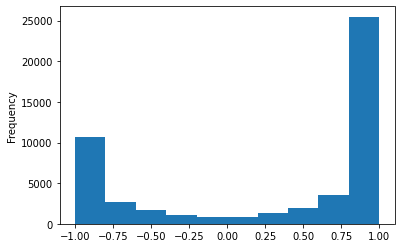

In [65]:
imdb['sentiment_vader'].plot.hist()

In [63]:
def get_sentiment_label(compound_score):
    if compound_score > 0:
        return 'positive'
    else:
        return 'negative'

def get_sentiment_label_mod(compound_score):
    if compound_score > 0.2:
        return 'positive'
    elif compound_score < -0.2:
        return 'negative'
    else:
        return 'neural'

In [67]:
imdb['sentiment_pred_label'] = imdb['sentiment_vader'].apply(get_sentiment_label)
imdb['sentiment_pred_label'].value_counts()

positive    33069
negative    16931
Name: sentiment_pred_label, dtype: int64

In [68]:
print(accuracy_score(imdb['sentiment_pred_label'], imdb['sentiment']))

0.6943


## Document Clustering

In [74]:
# https://jmcauley.ucsd.edu/data/amazon/
reviews = pd.read_csv('/kaggle/input/trainings/amazon_reviews_big.csv').sample(5000).reset_index()
reviews.shape

(5000, 9)

### Case studies
- Sentiment classifier
- Recommendation (user, item)
- Story telling & Building dashboards
- Topic modelling (document clustering)
- How to handle big text data

In [72]:
reviews.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
46531,B00E3W15P0,5,This is the best &#34;add on&#34; I have ever ...,"06 29, 2014",A2GMJ3DJ7CBM1D,L. M. Mccarthy,BEST THING I HAVE EVER DONE TO A COMPUTER,1.404000e+09
52483,B000UOMGU8,5,Works well and can be tilted just past 90 degr...,"08 21, 2013",A3TBI6FJIVLW3K,"JBellrmr ""2Busy""",Nice,1.377043e+09
9354,B00847TYYO,5,"If you read/write a lot of text in your work, ...","06 11, 2013",A2UK5HQS62ESQP,"A. Ferreira ""64-year old baby boomer""",Great for business users,1.370909e+09
40102,B005UW6HP0,4,"It's called extra small, but it easily swallow...","10 27, 2012",A1RN1M545PB107,David Tenser,"Bigger than I thought, but still good value an...",1.351296e+09
1236,B004N7146U,5,I had been looking for a bluetooth keyboard th...,"02 20, 2013",A1OP2E8G4BTUIM,Carrie,Absolutely fantastic!,1.361318e+09


In [75]:
reviews['reviewText'].isna().sum()

3

In [86]:
from wordcloud import WordCloud
docs = reviews['reviewText'].fillna('Not available').str.lower()
docs_string = ' '.join(docs)
stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords = ['use', 'will', 'get', 'one', 'would', 'like']
all_stopwords = np.hstack([stopwords, custom_stopwords])
wc = WordCloud(background_color='white', stopwords=all_stopwords).generate(docs_string)

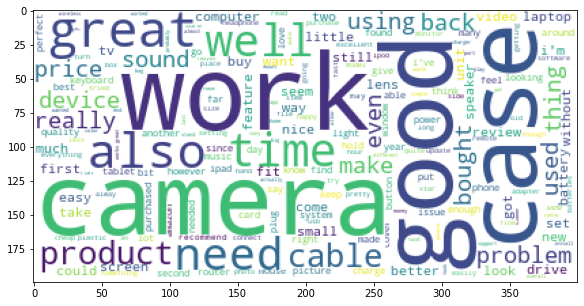

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.imshow(wc)

In [88]:
docs = reviews['reviewText'].fillna('Not available').str.lower().str.replace('[^a-z\s]', '')
docs = docs.apply(remove_stopwords)
stemmer = PorterStemmer()
docs = stemmer.stem_documents(docs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [91]:
vectorizer = TfidfVectorizer(min_df=5).fit(docs)
dtm = vectorizer.transform(docs)
vocab = vectorizer.get_feature_names()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm.shape

(5000, 3468)

In [92]:
from sklearn.cluster import KMeans

n_clusters = []
scores = []
for i in range(3, 10):
    n_clusters.append(i)
    kmeans_model = KMeans(n_clusters=i).fit(df_dtm)
    score = kmeans_model.inertia_
    scores.append(score)

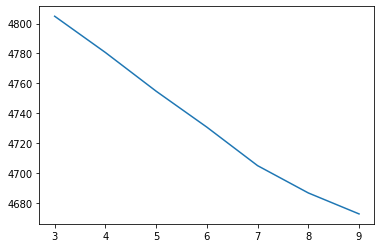

In [93]:
plt.plot(n_clusters, scores)

In [94]:
kmeans = KMeans(n_clusters=8).fit(df_dtm)

In [96]:
reviews['cluster'] = kmeans.labels_
reviews['cluster'].value_counts()

6    2875
0     434
2     433
3     295
7     294
5     277
1     239
4     153
Name: cluster, dtype: int64

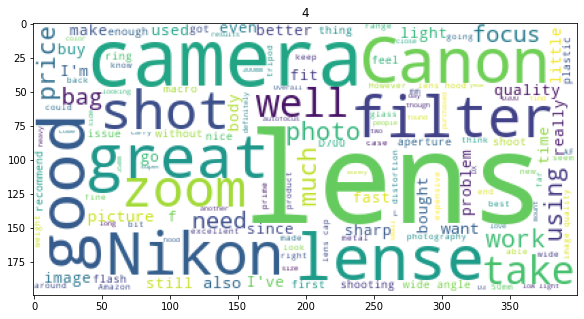

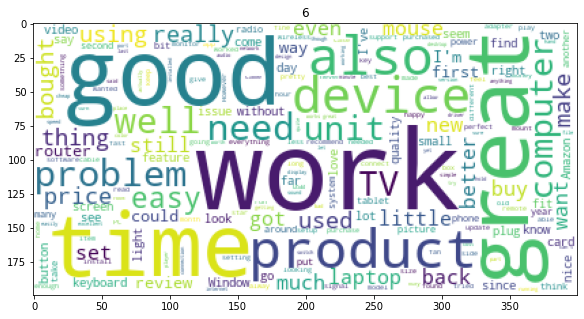

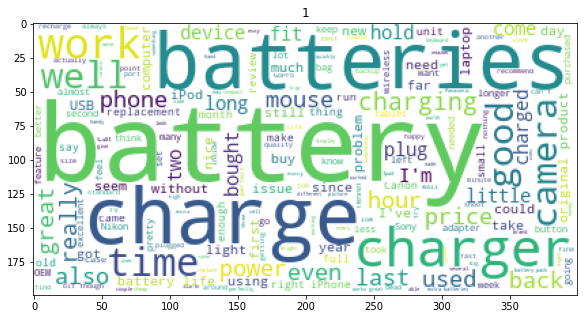

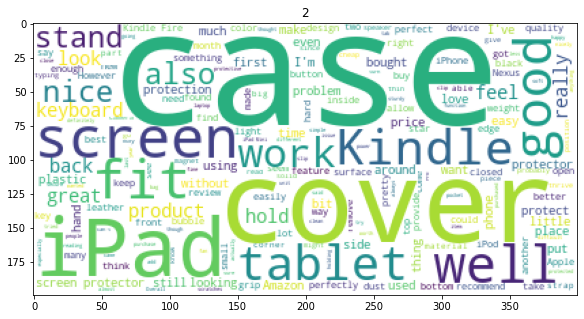

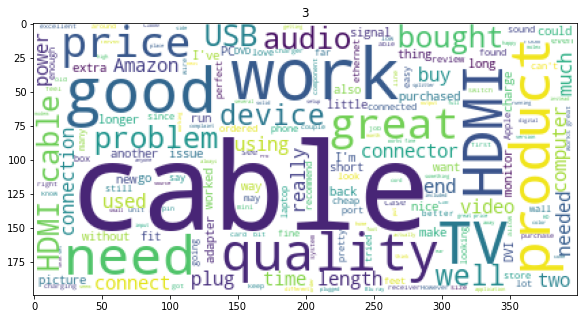

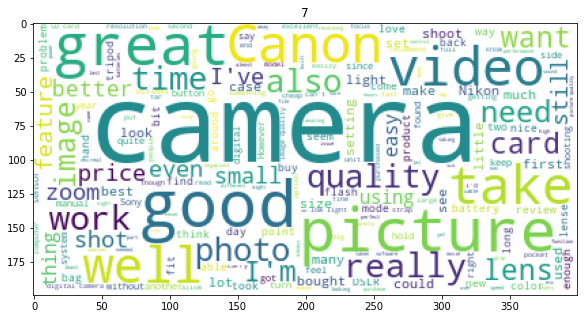

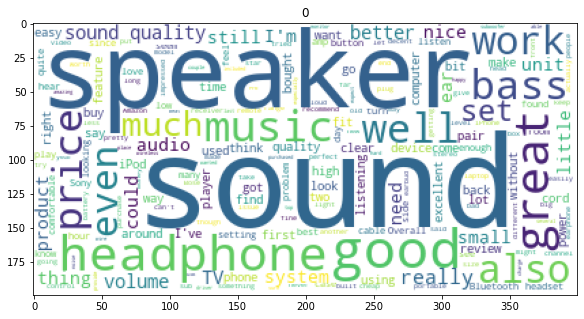

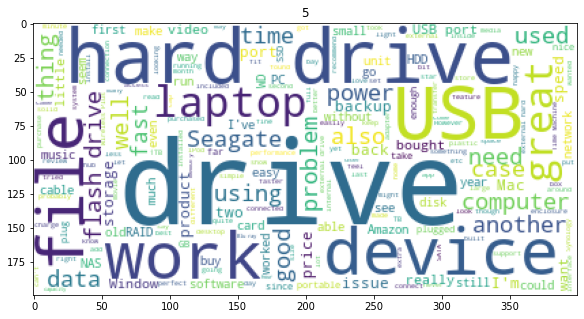

In [99]:
for cluster_label in reviews['cluster'].unique():
    plt.figure(figsize=(14,5))
    cluster_reviews = reviews[reviews['cluster'] == cluster_label]['reviewText'].fillna('Not available')
    custom_stopwords = ['use', 'will', 'get', 'one', 'would', 'like']
    all_stopwords = np.hstack([stopwords, custom_stopwords])
    docs_string = ' '.join(cluster_reviews)
    wc = WordCloud(background_color='white', stopwords=all_stopwords).generate(docs_string)
    plt.imshow(wc)
    plt.title(cluster_label)

### Optional exercises
- Quora insincere questions classification: https://www.kaggle.com/c/quora-insincere-questions-classification
- CommonLit Readability (regression): https://www.kaggle.com/c/commonlitreadabilityprize
- For amazon reviews clustering:
    - subplots (4x2): For each cluster plot top 10 tokens (unigrams)
- Go through the data extracting code in https://jmcauley.ucsd.edu/data/amazon/ 

### Limitations of Document Term Matrix
- Sparsity
    - close to 95% of the values will be zero
- High dimension
    - Document vectors: Dimension is based on vocabulary size
    - Word vectors: Dimension is based on no. of documents
    - In thousands
- Vector representation of words/terms is very local (specific to the dataset)
    - Alternative: Have a global vector representation for commonly used words in literature???
- Relationship between the terms are not preserved/captured
    - Cannot determine if two words appears next to each (context) or away from each other

In [58]:
#small_reviews = imdb['review'].head(5).str.lower().str.split(' ')
from gensim.models import word2vec
sentences = [['this', 'movie', 'is', 'good'],
             ['this', 'movie', 'is', 'awesome']]
model = word2vec.Word2Vec(sentences=sentences, vector_size=50, window=3, min_count=1, sg=1)
words = list(model.wv.index_to_key)
embeddings_matrix = model.wv[words]
df_embeddings_matrix = pd.DataFrame(embeddings_matrix, index=words)
df_embeddings_matrix

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
is,-0.001072,0.000473,0.010207,0.018019,-0.018606,-0.014234,0.012918,0.017946,-0.010031,-0.007527,...,-0.019207,0.010015,-0.017519,-0.008784,-0.000070,-0.000592,-0.015322,0.019229,0.009964,0.018466
movie,-0.016316,0.008992,-0.008274,0.001649,0.016997,-0.008924,0.009035,-0.013574,-0.007097,0.018797,...,0.003263,0.000380,0.006947,0.000436,0.019238,0.010121,-0.017835,-0.014083,0.001803,0.012785
this,-0.017239,0.007331,0.010380,0.011484,0.014934,-0.012335,0.002211,0.012095,-0.005680,-0.012347,...,0.015796,-0.013979,-0.018312,-0.000712,-0.006200,0.015789,0.011877,-0.003091,0.003022,0.003580
awesome,0.015635,-0.019020,-0.000411,0.006938,-0.001878,0.016764,0.018022,0.013073,-0.001423,0.015421,...,0.002175,-0.003152,0.004393,-0.015763,-0.005434,0.005326,0.010693,-0.004783,-0.019020,0.009012
good,0.000189,0.006155,-0.013625,-0.002751,0.015337,0.014693,-0.007347,0.005285,-0.016634,0.012411,...,-0.011188,0.003461,-0.001795,0.013587,0.007947,0.009059,0.002869,-0.005400,-0.008734,-0.002064


In [51]:
len(words)

523

In [48]:
model.wv['with']


array([-0.01355551,  0.00148575, -0.01481559, -0.00417817,  0.00790619,
        0.00874464,  0.0061525 ,  0.01023291, -0.0146161 ,  0.01529086,
       -0.01069163,  0.00500167, -0.01666947,  0.00456774, -0.01289515,
       -0.00727123, -0.00215999,  0.01226187,  0.00725494, -0.01218999,
        0.00091168, -0.01576705,  0.02179875,  0.01750719, -0.00061939,
        0.00311404,  0.00062714,  0.01096487, -0.02131888,  0.00089164,
        0.01515117,  0.00509496,  0.00189558, -0.01857469,  0.01181475,
       -0.01034498, -0.00211288,  0.00883407,  0.00061737, -0.00090456,
        0.00806135, -0.01318909, -0.02097243,  0.01852757,  0.01954479,
       -0.0128671 ,  0.00731754, -0.0013723 ,  0.01092053, -0.01357342],
      dtype=float32)